<a href="https://colab.research.google.com/github/shreyasrajesh0308/NNDL-proj/blob/main/gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LSTM experiments 

# Running experiments on the BCI data with baseline LSTMs.

Model Paper: 

### Load Data 

Load preprocessed data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:

X_test = np.load("/content/drive/MyDrive/eeg_project/X_test.npy")
y_test = np.load("/content/drive/MyDrive/eeg_project/y_test.npy")
person_train_valid = np.load("/content/drive/MyDrive/eeg_project/person_train_valid.npy")
X_train_valid = np.load("/content/drive/MyDrive/eeg_project/X_train_valid.npy")
y_train_valid = np.load("/content/drive/MyDrive/eeg_project/y_train_valid.npy")
person_test = np.load("/content/drive/MyDrive/eeg_project/person_test.npy")


In [ ]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [ ]:
print(np.unique(y_train_valid))
print(np.unique(y_test))

[769 770 771 772]
[769 770 771 772]


In [ ]:
num_classes = 4
y_train_valid = y_train_valid-769
y_test = y_test-769
y_train_valid = keras.utils.to_categorical(y_train_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Indices for subject one training 

In [ ]:
train_indeces = [ i for i in range(len(person_train_valid)) if person_train_valid[i]==0]
X_train_subject_1 = X_train_valid[train_indeces]
y_train_subject_1 = y_train_valid[train_indeces]

### Indices for subject one testing 

In [ ]:
test_indeces = [ i for i in range(len(person_test)) if person_test[i]==0]
X_test_subject_1 = X_test[test_indeces]
y_test_subject_1 = y_test[test_indeces]

In [ ]:
print(X_train_subject_1.shape)
print(X_test_subject_1.shape)
print(y_train_subject_1.shape)
print(y_test_subject_1.shape)

(237, 22, 1000)
(50, 22, 1000)
(237, 4)
(50, 4)


In [ ]:
num_classes = len(np.unique(y_train_valid))

In [ ]:
X_train_subject_1 = np.swapaxes(X_train_subject_1, 1, 2)
X_test_subject_1 = np.swapaxes(X_test_subject_1, 1, 2)

In [ ]:
X_train_subject_1.shape

(237, 1000, 22)

In [ ]:
X_test_subject_1.shape

(50, 1000, 22)

## Building a baseline with an LSTM model, trained with one subject data

In [ ]:
print(X_train_subject_1.shape, y_train_subject_1.shape)

(237, 1000, 22) (237, 4)


In [ ]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      layers.GRU(512)
    )
)
model.add(keras.layers.Dropout(rate=0.7))
model.add(keras.layers.Dense(units=4096, activation='relu'))
model.add(keras.layers.Dense(y_train_subject_1.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_15 (Bidirecti  (None, 1024)             1646592   
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_30 (Dense)            (None, 4096)              4198400   
                                                                 
 dense_31 (Dense)            (None, 4)                 16388     
                                                                 
Total params: 5,861,380
Trainable params: 5,861,380
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train_subject_1, y_train_subject_1,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/20
4/4 [==============================] - 5s 465ms/step - loss: 2.8025 - acc: 0.2347 - val_loss: 3.1596 - val_acc: 0.2500
Epoch 2/20
4/4 [==============================] - 1s 273ms/step - loss: 2.3859 - acc: 0.3333 - val_loss: 2.7915 - val_acc: 0.2500
Epoch 3/20
4/4 [==============================] - 1s 270ms/step - loss: 1.9328 - acc: 0.4554 - val_loss: 2.7928 - val_acc: 0.2917
Epoch 4/20
4/4 [==============================] - 1s 270ms/step - loss: 1.9750 - acc: 0.4319 - val_loss: 2.3347 - val_acc: 0.2917
Epoch 5/20
4/4 [==============================] - 1s 272ms/step - loss: 1.8234 - acc: 0.4836 - val_loss: 2.7275 - val_acc: 0.2500
Epoch 6/20
4/4 [==============================] - 1s 268ms/step - loss: 1.4278 - acc: 0.5211 - val_loss: 2.7590 - val_acc: 0.1667
Epoch 7/20
4/4 [==============================] - 1s 271ms/step - loss: 1.3053 - acc: 0.5352 - val_loss: 2.7625 - val_acc: 0.2917
Epoch 8/20
4/4 [==============================] - 1s 272ms/step - loss: 1.1462 - acc: 0.60

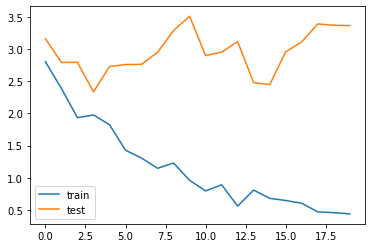

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
model.evaluate(X_test_subject_1, y_test_subject_1)

2/2 [==============================] - 0s 133ms/step - loss: 2.3842 - acc: 0.3000


[2.3841753005981445, 0.30000001192092896]